In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, KBinsDiscretizer

In [2]:
fulldata = pd.read_csv('data/titanic.csv')

In [3]:
fulldata.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
X = fulldata.drop(['Survived'],axis=1)

y = fulldata['Survived']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.25)

In [6]:
X_trainrest = X_train.reset_index()
X_testrest = X_test.reset_index()

In [7]:
# Step 7 Replace missing age values by the mean age.
imputer = SimpleImputer()

X_trainage = imputer.fit_transform(X_trainrest[['Age']])
X_trainage = pd.DataFrame(X_trainage)

X_testage = imputer.transform(X_testrest[['Age']])
X_testage = pd.DataFrame(X_testage)

In [8]:
imputer_most = SimpleImputer(strategy='most_frequent')

X_trainclass = imputer_most.fit_transform(X_trainrest[['Embarked']])
X_trainclass = pd.DataFrame(X_trainclass)

X_testclass = imputer_most.fit_transform(X_testrest[['Embarked']])
X_testclass = pd.DataFrame(X_testclass)

In [9]:
X_trainf = pd.concat([X_trainrest,X_trainage],axis=1)

X_testf = pd.concat([X_testrest,X_testage],axis=1)

In [10]:
X_train_fd = X_trainf.drop(['index','PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Embarked'],axis=1,)

X_test_fd = X_testf.drop(['index','PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Embarked'],axis=1,)
#x_train_fd

In [11]:
X_train_fd = X_train_fd.rename({0:'Age'},axis =1)

X_test_fd = X_test_fd.rename({0:'Age'},axis =1)

#x_train_fd

In [12]:
X_trainf = pd.concat([X_train_fd,X_trainclass],axis=1)

X_testf = pd.concat([X_test_fd,X_testclass],axis=1)

In [13]:
X_train_fd = X_trainf.rename({0:'Embarked'},axis =1)
X_test_fd = X_testf.rename({0:'Embarked'}, axis =1)

In [14]:
ohe = OneHotEncoder(sparse=False, drop='first')
kbins = KBinsDiscretizer(n_bins=4, encode='onehot-dense', strategy='quantile')

In [15]:
ohe_Xtrain_sex = ohe.fit_transform(X_train_fd[['Sex']])
ohe_Xtest_sex = ohe.transform(X_test_fd[['Sex']])

In [16]:
ohe_df_sex = pd.DataFrame(ohe_Xtrain_sex, columns=ohe.get_feature_names_out())
ohe_df_sex_test = pd.DataFrame(ohe_Xtest_sex, columns=ohe.get_feature_names_out())

In [17]:
ohe_Xtrain_pc = ohe.fit_transform(X_train_fd[['Pclass']])
ohe_Xtest_pc = ohe.fit_transform(X_test_fd[['Pclass']])

ohe_df_pc = pd.DataFrame(ohe_Xtrain_pc, columns=ohe.get_feature_names_out())
ohe_df_pc_test = pd.DataFrame(ohe_Xtest_pc, columns=ohe.get_feature_names_out())

In [18]:
ohe_Xtrain_em = ohe.fit_transform(X_train_fd[['Embarked']])
ohe_Xtest_em = ohe.fit_transform(X_test_fd[['Embarked']])

ohe_df_em = pd.DataFrame(ohe_Xtrain_em, columns=ohe.get_feature_names_out())
ohe_df_em_test = pd.DataFrame(ohe_Xtest_em, columns=ohe.get_feature_names_out())

In [19]:
imputed_df_train=pd.DataFrame(X_train_fd, columns=['Age'])
imputed_df_test=pd.DataFrame(X_test_fd, columns=['Age'])

In [20]:
binned_Xtrain = kbins.fit_transform(imputed_df_train[['Age']])
binned_Xtest = kbins.transform(imputed_df_test[['Age']])

In [21]:
# BONUS: create nice labels
edges = kbins.bin_edges_[0].round(1)
labels = []
for i in range(len(edges)-1):
    edge1 = edges[i]
    edge2 = edges[i+1]
    labels.append(f"{edge1}_to_{edge2}")

# create a DataFrame
df_bins_train = pd.DataFrame(binned_Xtrain, columns=labels)
df_bins_test = pd.DataFrame(binned_Xtest, columns=labels)

In [22]:
Xtrain_fe=pd.concat([df_bins_train , ohe_df_sex , ohe_df_pc , ohe_df_em], axis=1)

In [23]:
m = LogisticRegression()

In [24]:
scores = cross_val_score(m, Xtrain_fe, y_train, cv=5)
scores.round(3) 

array([0.754, 0.799, 0.716, 0.835, 0.827])

In [25]:
f"Mean cross-validation score: {scores.mean(): 5.3f}"

'Mean cross-validation score:  0.786'

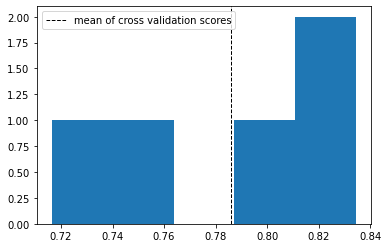

In [26]:
plt.hist(scores, bins=5) 
# We can plot some vertical lines to mark a constant value on our plot

# A vertical line at the mean of our CV scores
plt.axvline(scores.mean(), color='k', linestyle='dashed', linewidth=1, label='mean of cross validation scores')

# A vertical line at the initial model training score
# plt.axvline(score, color='r', linestyle='dashed', linewidth=1, label='initial model score')

plt.legend()